In [1]:
import numpy as np

matrix = np.zeros((11, 11, 11), int)

# 0 - Empty cube
# 1 - Start cube
# 2 - End cube
# 3 - Obstacle

matrix[0][5][5] = 1
matrix[10][5][5] = 2
matrix[5][4:6] = 3

print(matrix[0])
print(matrix[10])

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


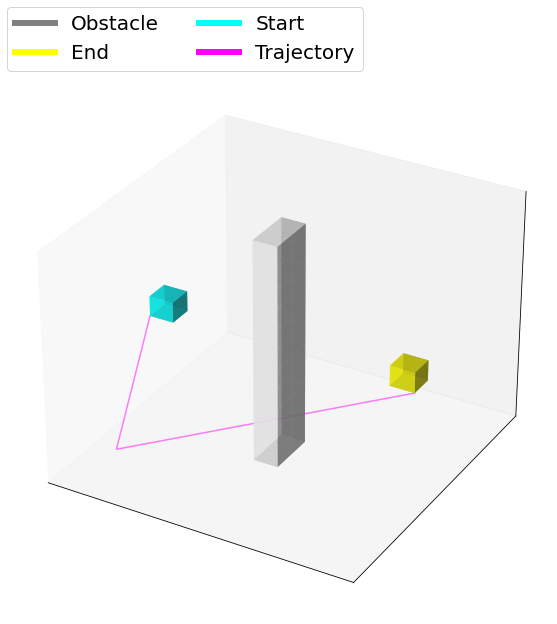

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np


# prepare some coordinates
x, y, z = np.indices(matrix.shape)
colors = np.empty(list(matrix.shape) + [4], dtype=object)
voxelarray = np.full(matrix.shape, False)

# draw cuboids in the top left and bottom right corners, and a link between
# them
for x_ind, slice in enumerate(matrix):
    for y_ind, row in enumerate(slice):
        for z_ind, cell in enumerate(row):
            if cell == 0:
                continue
            elif cell == 1:
                cube = (x == x_ind) & (y == y_ind) & (z == z_ind)
                voxelarray = voxelarray | cube
                colors[cube] = [0, 1, 1, 0.7]
            elif cell == 2:
                cube = (x == x_ind) & (y == y_ind) & (z == z_ind)
                voxelarray = voxelarray | cube
                colors[cube] = [1, 1, 0, 0.7]
            elif cell == 3:
                cube = (x == x_ind) & (y == y_ind) & (z == z_ind)
                voxelarray = voxelarray | cube
                colors[cube] = [1, 1, 1, 0.7]

# and plot everything
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d', yticks=[], xticks=[], zticks=[])
ax.voxels(voxelarray, facecolors=colors)

throwing_x = [0, 1, 11]
throwing_y = [5, 1, 5]
throwing_z = [5, 1, 5]
ax.plot(throwing_x,throwing_y,throwing_z,color=[1, 0, 1, 0.5])

# For different views
# ax.view_init(100, 90)

legend_elements = [Line2D([0], [0], color='grey', lw=6, label='Obstacle'),
                   Line2D([0], [0], color='yellow', lw=6, label='End'),
                  Line2D([0], [0], color='cyan', lw=6, label='Start'),
                  Line2D([0], [0], color='magenta', lw=6, label='Trajectory')]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0., 1.02, 1., .102),
                      ncol=2, borderaxespad=0., fontsize = 20)

plt.show()